## Uninón de datasets
Una vez seleccionadas las columnas con las que se desea trabajar previamente sobre los datasets de 2013 a 2017, se unen en un único dataset. Realizado esto, se ve la respectiva imputación de datos, la cual se realiza mediante un modelo de clasificación de regresión logística para los valores nulos presentes en las columnas del número de fallecidos, graves, leves y menos leves.

In [396]:
# Importacion de librerias que se emplearan
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import re

# librerias regresion logistica
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

## Dataset 2013

In [397]:
# Lectura del dataset y previsualizacion de los datos
df2013 = pd.read_csv("../data_limpia/Dataset_2013_ordenado.csv")
print(df2013.shape)
df2013.head()

(1768, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.714761,-33.621957,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,12489,0,1,0,0,0
1,-70.713433,-33.629206,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,20040,0,0,0,0,1
2,-70.712113,-33.601339,2013,SAN BERNARDO,CALLE 1 DE MAYO,EYZAGUIRRE,0,1,0,0,0,1
3,-70.710571,-33.601829,2013,SAN BERNARDO,CALLE 1 DE MAYO,FIDEL PINOCHET,0,1,1,0,0,0
4,-70.707259,-33.636547,2013,SANTIAGO,PORTALES,NaN,3000,0,0,1,0,0


## Dataset 2014

In [398]:
# Lectura del dataset y previsualizacion de los datos
df2014 = pd.read_csv("../data_limpia/Dataset_2014_ordenado.csv")
print(df2014.shape)
df2014.head()

(1690, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.797727,-33.456009,2014,PUDAHUEL,CAMINO LA FARFANA,NaN,400,0,0,1,0,0
1,-70.796959,-33.516373,2014,MAIPU,EL CONQUISTADOR,NaN,1660,0,0,0,1,0
2,-70.795044,-33.516192,2014,MAIPU,LAS TINAJAS,NaN,2838,0,0,0,1,0
3,-70.794488,-33.514124,2014,MAIPU,LA GALAXIA,NaN,1791,0,0,0,1,0
4,-70.793303,-33.532115,2014,MAIPU,4 PONIENTE,ALFREDO SILVA CARVALLO,0,1,0,0,0,1


## Dataset 2015

In [399]:
# Lectura del dataset y previsualizacion de los datos
df2015 = pd.read_csv("../data_limpia/Dataset_2015_ordenado.csv")
print(df2015.shape)
df2015.head()

(1841, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.798508,-33.364435,2015,PUDAHUEL,CAMINO RENCA LAMPA,CAMINO AGUAS CLARAS,0,1,0,1,0,0
1,-70.797142,-33.354941,2015,QUILICURA,CAMINO LO ECHEVERS,CAMINO PRIVADO,0,1,0,1,0,0
2,-70.797944,-33.511716,2015,MAIPU,EL CONQUISTADOR,SENADORA MARIA DE LA CRUZ,0,1,0,1,0,1
3,-70.797199,-33.513151,2015,MAIPU,EL CONQUISTADOR,PINTOR HORACIO GARCIA,0,1,0,1,0,0
4,-70.797021,-33.518601,2015,MAIPU,EL CONQUISTADOR,NaN,1370,0,0,1,0,0


## Dataset 2016

In [400]:
# Lectura del dataset y previsualizacion de los datos
df2016 = pd.read_csv("../data_limpia/Dataset_2016_ordenado.csv")
print(df2016.shape)
df2016.head() 

(1875, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.921865,-33.088773,2016,TILTIL,EL ESPINO,NaN,39,0,0.0,0.0,0.0,1.0
1,-70.918988,-33.089121,2016,TILTIL,BARROS ARANA,NaN,10,0,0.0,0.0,0.0,2.0
2,-70.881707,-33.278868,2016,LAMPA,BAQUEDANO,NaN,65,0,0.0,0.0,1.0,0.0
3,-70.873056,-33.285780,2016,LAMPA,PEDRO AGUIRRE CERDA,SGTO ALDEA,0,1,0.0,0.0,0.0,1.0
4,-70.870458,-33.282819,2016,LAMPA,PEDRO AGUIRRE CERDA,NaN,1370,0,0.0,0.0,0.0,1.0


## Dataset 2017

In [401]:
# Lectura del dataset y previsualizacion de los datos
df2017 = pd.read_csv("../data_limpia/Dataset_2017_ordenado.csv")
print(df2017.shape)
df2017.head() 

(2065, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.542220,-33.473719,2017,PEÑALOLEN,CONSISTORIAL,TAGUA TAGUA,0,1,NaN,NaN,NaN,NaN
1,-70.542197,-33.450019,2017,LA REINA,VALENZUELA LLANOS,NaN,8622,0,0.0,0.0,0.0,1.0
2,-70.541772,-33.476860,2017,PEÑALOLEN,GRECIA,LOS MOLINEROS,0,1,0.0,1.0,1.0,2.0
3,-70.541637,-33.476406,2017,PEÑALOLEN,GRECIA,NaN,8735,0,0.0,0.0,0.0,1.0
4,-70.541548,-33.462810,2017,PEÑALOLEN,JOSE ARRIETA,DIPUTADA LAURA RODRIGUE,0,1,NaN,NaN,NaN,NaN


## Unión de datasets

In [898]:
frames = [df2013, df2014, df2015, df2016, df2017]
df = pd.concat(frames)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(9239, 12)


,X,Y,Anio,Comuna,Calle1,Calle2,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
0,-70.714761,-33.621957,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,12489,0,1.0,0.0,0.0,0.0
1,-70.713433,-33.629206,2013,SAN BERNARDO,PRESIDENTE JORGE ALESSANDRI RODRIGUEZ,NaN,20040,0,0.0,0.0,0.0,1.0
2,-70.712113,-33.601339,2013,SAN BERNARDO,CALLE 1 DE MAYO,EYZAGUIRRE,0,1,0.0,0.0,0.0,1.0
3,-70.710571,-33.601829,2013,SAN BERNARDO,CALLE 1 DE MAYO,FIDEL PINOCHET,0,1,1.0,0.0,0.0,0.0
4,-70.707259,-33.636547,2013,SANTIAGO,PORTALES,NaN,3000,0,0.0,1.0,0.0,0.0


## Datos básicos del dataset

In [899]:
df.describe()

,X,Y,Anio,Numero,Interseccion,Fallecidos,Graves,MenosGraves,Leves
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,7989.000000,7883.000000,7792.000000,7683.000000
mean,-70.643993,-33.470311,2015.084316,1024.665224,0.728109,0.063087,0.319548,0.103183,0.799037
std,0.066069,0.070750,1.427747,2726.923291,0.444958,0.257634,0.545106,0.324628,0.794222
min,-70.921865,-33.648727,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-70.688593,-33.519193,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-70.643117,-33.454887,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,-70.591146,-33.424681,2016.000000,167.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,-70.482420,-33.088773,2017.000000,76771.000000,1.000000,3.000000,5.000000,3.000000,10.000000


In [900]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(9239, 12)
Tipo de variable de las columnas:
X               float64
Y               float64
Anio              int64
Comuna           object
Calle1           object
Calle2           object
Numero            int64
Interseccion      int64
Fallecidos      float64
Graves          float64
MenosGraves     float64
Leves           float64
dtype: object
Cantidad de valores nulos por columna:
X                  0
Y                  0
Anio               0
Comuna             0
Calle1             0
Calle2          2580
Numero             0
Interseccion       0
Fallecidos      1250
Graves          1356
MenosGraves     1447
Leves           1556
dtype: int64


## Normalizacion de abreviaciones de "Calle1"

In [901]:
# abreviacion de "alcalde"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("ALC", "ALCALDE") if ("ALC " in x) else x)
# abreviacion "almirante"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("ALMTE", "ALMIRANTE") if ("ALMTE " in x) else x)
# abreviacion "bombero"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("BOMB", "BOMBERO") if ("BOMB " in x) else x)
# abreviacion de "capitan"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("CAP", "CAPITAN") if ("CAP " in x) else x)
# abreviacion de "cardenal"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("CARD", "CARDENAL") if ("CARD " in x) else x)
# abreviacion de "comandante"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("CDTE", "COMANDANTE") if ("CDTE " in x) else x)
# abreviacion de "costanera"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("COST", "COSTANERA") if ("COST " in x) else x)
# abreviacion de "coronel"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("CRNEL", "CORONEL") if ("CRNEL " in x) else x)
# abreviacion "diagonal"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("DIAG", "DIAGONAL") if ("DIAG " in x) else x)
# abreviacion "doctor"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("DR", "DOCTOR") if ("DR " in x) else x)
# abreviacion "escuela"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("ESC", "ESCUELA") if ("ESC " in x) else x)
# abreviacion "general"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("GRAL", "GENERAL") if ("GRAL " in x) else x)
# abreviacion de "monseñor"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("MONS", "MONSENOR") if ("MONS " in x) else x)
# abreviacion de "nuestra"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("NSTRA", "NUESTRA") if ("NSTRA " in x) else x)
# abreviacion de "nueva"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("NVA", "NUEVA") if ("NVA " in x) else x)
# abreviacion de "obispo"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("OBPO", "OBISPO") if ("OBPO " in x) else x)
# abreviacion de "presidente"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("PDTE", "PRESIDENTE") if ("PDTE " in x) else x)
# abreviacion de "profesor"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("PROFE", "PROFESOR") if ("PROFE " in x) else x)
# abreviacion "puerto"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("PTO", "PUERTO") if ("PTO " in x) else x)
# abreviacion de "santa"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("STA", "SANTA") if ("STA  " in x) else x)
# abreviacion de "santo"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("STO", "SANTO") if ("STO  " in x) else x)
# abreviacion de "teniente"
df["Calle1"] = df["Calle1"].apply(lambda x: x.replace("TTE", "TENIENTE") if ("TTE  " in x) else x)

## Reemplazo de calles que estan mal escritas o se repiten con diferentes nombres (Calle1)

In [902]:
# HERMANOS AMUNATEGUI
df["Calle1"] = df["Calle1"].apply(lambda x: "HERMANOS AMUNATEGUI" if (x == "AMUNATEGUI") else x)
# CENTRAL CARDENAL SILVA HENRIQUEZ
df["Calle1"] = df["Calle1"].apply(lambda x: "CENTRAL CARDENAL SILVA HENRIQUEZ" if (x == "CENTRAL CARD SILVA HENRIQUEZ" or 
                                                                                               x == "CENTRAL CARDENAL SILVA HEN") else x)
# COMPANIA DE JESUS
df["Calle1"] = df["Calle1"].apply(lambda x: "COMPANIA DE JESUS" if x == "COMPANIA" else x)
# COSTANERA MONSENOR ESCRIVA DE BALAGUER
df["Calle1"] = df["Calle1"].apply(lambda x: "COSTANERA MONSENOR ESCRIVA DE BALAGUER" if (x == "COSTANERA MONSENOR ESCRIVA DE BA" or 
                                                                                                     x == "COSTANERA MONSENORESCRIVA DE BALAGUER") else x)
# DIPUTADA LAURA RODRIGUEZ
df["Calle1"] = df["Calle1"].apply(lambda x: "DIPUTADA LAURA RODRIGUEZ" if x == "DIP LAURA RODRIGUEZ" else x)
# GRAN AVENIDA JOSE MIGUEL CARRERA
df["Calle1"] = df["Calle1"].apply(lambda x: "GRAN AVENIDA JOSE MIGUEL CARRERA" if (x == "GRAN AVDA JOSE MIGUEL CARRERA" 
                                                                                               or ("GRAN AVENIDA " in x)) else x)
# LIBERTADOR BERNARDO OHIGGINS
df["Calle1"] = df["Calle1"].apply(lambda x: "LIBERTADOR BERNARDO OHIGGINS" if (x == "LIBER BERNARDO OHIGGINS" or ("LIBERTADOR BERNA" in x)) else x)
# LICENCIADO DE LAS PENAS
df["Calle1"] = df["Calle1"].apply(lambda x: "LICENCIADO DE LAS PENAS" if x == "LICENCIADA DE LAS PENAS" else x)
# OCEANIA
df["Calle1"] = df["Calle1"].apply(lambda x: "OCEANIA" if x == "OCEANICA" else x)
# TENIENTE DE MARINA ROLANDO FRODEN
df["Calle1"] = df["Calle1"].apply(lambda x: "TENIENTE DE MARINA ROLANDO FRODEN" if x == "TENIENTE DE M" else x)

## Los valores nulos de la columna "Calle2" se dejan como espacios vacíos.

In [903]:
df["Calle2"] = df["Calle2"].apply(lambda x: "" if(x is np.nan) else x)
print("Cantidad nulos Calle2: ", df["Calle2"].isna().sum())

Cantidad nulos Calle2:  0


## Normalizacion de abreviaciones de "Calle2"

In [904]:
# Abreviacion de "alcalde"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("ALC", "ALCALDE") if ("ALC " in x) else x)
# abreviacion "avenida"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("AVDA", "AVENIDA") if ("AVDA " in x) else x)
# Abreviacion "almirante"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("ALMTE", "ALMIRANTE") if ("ALMTE " in x) else x)
# Abreviacion "bombero"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("BOMB", "BOMBERO") if ("BOMB " in x) else x)
# abreviacion de "capitan"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("CAP", "CAPITAN") if ("CAP " in x) else x)
# abreviacion de "comandante"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("CDTE", "COMANDANTE") if ("CDTE " in x) else x)
# abreviacion de "cardenal"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("CARD", "CARDENAL") if ("CARD " in x) else x)
# abreviacion de "costanera"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("COST", "COSTANERA") if ("COST " in x) else x)
# abreviacion de "coronel"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("CRNEL", "CORONEL") if ("CRNEL " in x) else x)
# abreviacion "diagonal"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("DIAG", "DIAGONAL") if ("DIAG " in x) else x)
# abreviacion "doctor"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("DR", "DOCTOR") if ("DR " in x) else x)
# abreviacion "escuela"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("ESC", "ESCUELA") if ("ESC " in x) else x)
# abreviacion general
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("GRAL", "GENERAL") if ("GRAL " in x) else x)
# abreviacion de monseñor
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("MONS", "MONSENOR") if ("MONS " in x) else x)
# abreviacion de "nuestra"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("NSTRA", "NUESTRA") if ("NSTRA " in x) else x)
# abreviacion de "nueva"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("NVA", "NUEVA") if ("NVA " in x) else x)
# abreviacion de "obispo"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("OBPO", "OBISPO") if ("OBPO " in x) else x)
# abreviacion de "presidente"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("PDTE", "PRESIDENTE") if ("PDTE " in x) else x)
# abreviacion de "profesor"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("PROFE", "PROFESOR") if ("PROFE " in x) else x)
# abreviacion "puerto"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("PTO", "PUERTO") if ("PTO " in x) else x)
# abreviacion de "santa"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("STA", "SANTA") if ("STA  " in x) else x)
# abreviacion de "santo"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("STO", "SANTO") if ("STO  " in x) else x)
# abreviacion de "teniente"
df["Calle2"] = df["Calle2"].apply(lambda x: x.replace("TTE", "TENIENTE") if ("TTE  " in x) else x)

## Reemplazo de calles que estan mal escritas o se repiten con diferentes nombres (Calle2)

In [905]:
# 2 => 2 ORIENTE
df["Calle2"] = df["Calle2"].apply(lambda x: "2 ORIENTE" if x == "1" else x)

# ALCALDE CARLOS VALD | ALCALDE CARLOS VALDOVINO => ALCALDE CARLOS VALDOVINOS
df["Calle2"] = df["Calle2"].apply(lambda x: "ALCALDE CARLOS VALDOVINOS" if (x == "ALCALDE CARLOS VALD" or x == "ALCALDE CARLOS VALDOVINO") else x)

# ALCALDE EDUARDO CASTILLO VELA => ALCALDE EDUARDO CASTILLO VELASCO
df["Calle2"] = df["Calle2"].apply(lambda x: "ALCALDE EDUARDO CASTILLO VELASCO" if (x == "ALCALDE EDUARDO CASTILLO VELA") else x)

# CATTAN => CATAN
df["Calle2"] = df["Calle2"].apply(lambda x: "CATAN" if (x == "CATTAN") else x)

# CORONEL AGUSTIN LOPEZ => CORONEL AGUSTIN LOPEZ DE ALCAZAR
df["Calle2"] = df["Calle2"].apply(lambda x: "CORONEL AGUSTIN LOPEZ DE ALCAZAR" if (x == "CORONEL AGUSTIN LOPEZ") else x)

# DEPART => DEPARTAMENTAL
df["Calle2"] = df["Calle2"].apply(lambda x: "DEPARTAMENTAL" if (x == "DEPART") else x)

# DIP LAURA RODRIGUEZ | DIPUTADA LAURA RODRIGUE => DIPUTADA LAURA RODRIGUEZ
df["Calle2"] = df["Calle2"].apply(lambda x: "DIPUTADA LAURA RODRIGUEZ" if (x == "DIP LAURA RODRIGUEZ" or x == "DIPUTADA LAURA RODRIGUE") else x)

# GRAN  | GRAN AVDA JOSE MIGUEL CARRERA | GRAN AVE | GRAN AVENIDA JO | GRAN AVENIDA JOSE | GRAN AVENIDA JOSE MIGUEL CARR => GRAN AVENIDA JOSE MIGUEL CARRERA
df["Calle2"] = df["Calle2"].apply(lambda x: "GRAN AVENIDA JOSE MIGUEL CARRERA" 
                                              if (x == "GRAN" or x == "GRAN AVDA JOSE MIGUEL CARRERA" or 
                                                  x == "GRAN AVE" or x == "GRAN AVENIDA JO" or 
                                                  x == "GRAN AVENIDA JOSE" or x == "GRAN AVENIDA JOSE MIGUEL CARR") else x)

# LIBER BERNARDO OHIGGINS | LIBERTAD | LIBERTADOR | LIBERTADOR BERN | LIBERTADOR BERNA | LIBERTADOR BERNARDO | LIBERTADOR BERNARDO OHIGGI => LIBERTADOR BERNARDO OHIGGINS
df["Calle2"] = df["Calle2"].apply(lambda x: "LIBERTADOR BERNARDO OHIGGINS" 
                                              if (x == "LIBER BERNARDO OHIGGINS" or x == "LIBERTAD" or 
                                                  x == "LIBERTADOR" or x == "LIBERTADOR BERN" or 
                                                  x == "LIBERTADOR BERNA" or x == "LIBERTADOR BERNARDO" or
                                                  x == "LIBERTADOR BERNARDO OHIGGI") else x)

# MANUEL | MANUEL MATTA | MANUEL ANTO => MANUEL ANTONIO MATTA
df["Calle2"] = df["Calle2"].apply(lambda x: "MANUEL ANTONIO MATTA" if (x == "MANUEL" or x == "MANUEL MATTA" or
                                                                                      x == "MANUEL ANTO") else x)

# MARCH => MARCHANT PEREIRA
df["Calle2"] = df["Calle2"].apply(lambda x: "MARCHANT PEREIRA" if (x == "MARCH") else x)

# OSA MAYO => OSA MAYOR
df["Calle2"] = df["Calle2"].apply(lambda x: "OSA MAYOR" if (x == "OSA MAYO") else x)

# PRESID | PRESIDE => PRESIDENTE
df["Calle2"] = df["Calle2"].apply(lambda x: "PRESIDENTE" if (x == "PRESID" or x == "PRESIDE") else x)

# PRESIDENTE EDUARDO FREI MONTALV => PRESIDENTE EDUARDO FREI MONTALVA
df["Calle2"] = df["Calle2"].apply(lambda x: "PRESIDENTE EDUARDO FREI MONTALVA" if (x == "PRESIDENTE EDUARDO FREI MONTALV") else x)

# SAN FRANCISC => SAN FRANCISCO
df["Calle2"] = df["Calle2"].apply(lambda x: "SAN FRANCISCO" if (x == "SAN FRANCISC") else x)

# SAN VIC => SAN VICENTE DE PAUL
df["Calle2"] = df["Calle2"].apply(lambda x: "SAN VICENTE DE PAUL" if (x == "SAN VIC") else x)

# SUPER INTEN LUIS MORENO PAZ => SUPERINTENDENTE LUIS MORENO PAZ
df["Calle2"] = df["Calle2"].apply(lambda x: "SUPERINTENDENTE LUIS MORENO PAZ" if (x == "SUPER INTEN LUIS MORENO PAZ") else x)

# TOR | TORO => TORO MAZOTTE
df["Calle2"] = df["Calle2"].apply(lambda x: "TORO MAZOTTE" if (x == "TOR" or x == "TORO") else x)

## Revisión de posibles valores repetidos en comunas

In [906]:
df["Comuna"].value_counts()

SANTIAGO               970
PUENTE ALTO            744
LAS CONDES             584
PROVIDENCIA            503
MAIPU                  481
ÑUÑOA                  395
LA FLORIDA             358
PEÑALOLEN              330
QUINTA NORMAL          310
PUDAHUEL               305
ESTACION CENTRAL       290
EL BOSQUE              267
RECOLETA               266
QUILICURA              252
VITACURA               235
CERRO NAVIA            198
LA PINTANA             198
MACUL                  192
LA GRANJA              182
PEDRO AGUIRRE CERDA    165
SAN RAMON              165
LA CISTERNA            163
SAN BERNARDO           159
RENCA                  158
LO BARNECHEA           157
LA REINA               155
SAN JOAQUIN            151
CONCHALI               143
LO PRADO               142
SAN MIGUEL             131
INDEPENDENCIA          127
LO ESPEJO              105
HUECHURABA             104
COLINA                  74
CERRILLOS               52
LAMPA                   14
PADRE HURTADO            6
P

## Imputación de valores nulos
Como se puede apreciar de una descripción anterior, el dataset no está completamente limpio, puesto que posee valores nulos en los registros de número de fallecidos, graves, menos graves y leves. Ante esta situación lo que se emplea es un modelo clasificador de regresión logística. <br>
Para este modelo, se extraerán todos los registros que no posean valores nulos para cada una de esas cuatro variables. Se trabajará solo con las variables de latitud, longitud, año, comuna (que se traspasa a variable dummie) y si ocurrió o no en una interseccion.

<hr>

## Clasificador para el número de fallecidos

In [927]:
# Se observan las comunas que tienen valores nulos en fallecidos
df2 = df[["X", "Y", "Comuna", "Interseccion", "Numero", "Fallecidos"]][df.Fallecidos.isnull()]

# Se crea una lista con las comunas que esten en estos registros
lista_comunas = []
for i, e in enumerate(df2["Comuna"].value_counts().index):
    lista_comunas.append(e)

In [928]:
# Se extraen las columnas que no poseen nulos esos campos y que tengan las comunas que corresponden
df2 = df[["X", "Y", "Comuna", "Interseccion", "Numero", "Fallecidos"]][(df.Comuna.isin(lista_comunas)) & (~df.Fallecidos.isnull())]
df2

,X,Y,Comuna,Interseccion,Numero,Fallecidos
0,-70.714761,-33.621957,SAN BERNARDO,0,12489,1.0
1,-70.713433,-33.629206,SAN BERNARDO,0,20040,0.0
2,-70.712113,-33.601339,SAN BERNARDO,1,0,0.0
3,-70.710571,-33.601829,SAN BERNARDO,1,0,1.0
4,-70.707259,-33.636547,SANTIAGO,0,3000,0.0
...,...,...,...,...,...,...
9229,-70.650970,-33.400090,RECOLETA,1,0,0.0
9231,-70.650889,-33.550401,SAN RAMON,0,9870,0.0
9234,-70.650809,-33.440784,SANTIAGO,1,0,0.0
9236,-70.650763,-33.431405,RECOLETA,1,0,0.0


## Se convierte a tipo entero la variable a predecir

In [929]:
df2["Fallecidos"] = df2["Fallecidos"].astype("int64")

## Modelo para los fallecidos

In [930]:
df2["Fallecidos"].value_counts()

0    7503
1     455
2      20
3       3
Name: Fallecidos, dtype: int64

Como se aprecia, la mayoría de los datos están concentrados bajo la primera categoría (_fallecidos = 0_). Si se aplica un clasificador con la muestra que se extrajo, se puede presuponer que estará cláramente desbalanceada y sólo clasificará una categoría de forma eficiente. <br>
Si se contextualiza el problema, es deseable presuponer que es mejor predecir que exista un número mayor a cero de fallecidos a que no existan, para no incurrir en _falsos positivos_. Esto se razona con el fin de que, al momento de usar el modelo predictor final, ésta prediga que existen fallecidos y tener lo necesario para evitarlo, a predecir que no habrá siendo que en realidad si hubo. 
Para generar esto último es que se extrae una muestra del 5% del total de _fallecidos = 0_ mediante un muestreo estratificado por comunas y además y se agrupa en una sola categoría las opciones de _fallecidos > 0_, puesto que no tiene sentido poseer categorías con valores poco representativos. Esta última categoría se le aplica una marca de clase, por lo que está catalogada como _fallecidos = 3_. <br>
En resumen, se realiza un clasificador que esta desbalanceado a propósito para que prediga valores mayores a cero, o sea, que esté arrojando un mayor número de _verdaderos negativos_ que de _falsos positivos_, que bajo el contexto de que en un accidente de tránsito, es mejor para tomar las medidas correspondientes presuponiendo que si ocurrirán fallecidos y así evitarlo.

In [931]:
# Extraccion de solo aquellos registros que tengan fallecidos
df_estratificado = df2[df2.Fallecidos == 0]
df_estratificado

,X,Y,Comuna,Interseccion,Numero,Fallecidos
1,-70.713433,-33.629206,SAN BERNARDO,0,20040,0
2,-70.712113,-33.601339,SAN BERNARDO,1,0,0
4,-70.707259,-33.636547,SANTIAGO,0,3000,0
5,-70.706052,-33.607581,SAN BERNARDO,1,0,0
6,-70.703659,-33.613648,SAN BERNARDO,1,0,0
...,...,...,...,...,...,...
9229,-70.650970,-33.400090,RECOLETA,1,0,0
9231,-70.650889,-33.550401,SAN RAMON,0,9870,0
9234,-70.650809,-33.440784,SANTIAGO,1,0,0
9236,-70.650763,-33.431405,RECOLETA,1,0,0


In [932]:
# lista de DF por comuna que seran concatenados
frames = []

In [933]:
# funcion para obtener el 20% de las comunas de forma aleatoria y acumularlas en la lista 
def mergeComunas(lista):
    for e in lista:
        frames.append(df_estratificado[(df_estratificado["Comuna"].str.contains(e))].sample(frac = 0.05, random_state = 1))

In [934]:
# Llamada a la funcion y concatenacion de DF
mergeComunas(df_estratificado["Comuna"].value_counts().index)
df_estratificado2 = pd.concat(frames)
df_estratificado2

,X,Y,Comuna,Interseccion,Numero,Fallecidos
772,-70.658255,-33.438114,SANTIAGO,1,0,0
7287,-70.647248,-33.435314,SANTIAGO,1,0,0
1076,-70.646015,-33.434789,SANTIAGO,1,0,0
5786,-70.650683,-33.436074,SANTIAGO,0,955,0
5918,-70.637820,-33.443018,SANTIAGO,1,0,0
...,...,...,...,...,...,...
5844,-70.646544,-33.511047,SAN MIGUEL,1,0,0
1272,-70.656783,-33.509792,SAN MIGUEL,0,6001,0
6845,-70.690921,-33.479671,CERRILLOS,1,0,0
8857,-70.744998,-33.510215,CERRILLOS,1,0,0


Concatenacion del dataset de fallecidos = 0 y los otros casos.

In [935]:
df_final = pd.concat([df_estratificado2, df2[df2.Fallecidos != 0]])
df_final

,X,Y,Comuna,Interseccion,Numero,Fallecidos
772,-70.658255,-33.438114,SANTIAGO,1,0,0
7287,-70.647248,-33.435314,SANTIAGO,1,0,0
1076,-70.646015,-33.434789,SANTIAGO,1,0,0
5786,-70.650683,-33.436074,SANTIAGO,0,955,0
5918,-70.637820,-33.443018,SANTIAGO,1,0,0
...,...,...,...,...,...,...
8846,-70.746149,-33.239651,COLINA,1,0,1
8872,-70.742485,-33.409042,RENCA,1,0,2
8891,-70.739688,-33.439944,LO PRADO,1,0,1
9064,-70.663688,-33.403742,INDEPENDENCIA,0,2400,1


Se agrupa la categoría _fallecidos = 2_ y _fallecidos = 3_ en _fallecidos = 3_

In [936]:
#Funcion para agrupar las categorias de fallecidos = 2 y fallceidos = 3 en fallecidos = 3
df_final["Fallecidos"] = df_final["Fallecidos"].apply(lambda x: 3 if (x > 0) else x)
df_final["Fallecidos"].value_counts()

3    478
0    375
Name: Fallecidos, dtype: int64

Aplicacion de variables dumies

In [937]:
# Variables dummies
columnas_cat = ["Comuna"]
df_completo = pd.get_dummies(df_final, columns = columnas_cat)
df_completo

,X,Y,Interseccion,Numero,Fallecidos,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
772,-70.658255,-33.438114,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7287,-70.647248,-33.435314,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1076,-70.646015,-33.434789,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5786,-70.650683,-33.436074,0,955,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5918,-70.637820,-33.443018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,-70.746149,-33.239651,1,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8872,-70.742485,-33.409042,1,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8891,-70.739688,-33.439944,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9064,-70.663688,-33.403742,0,2400,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Correlación de pearson para evaluar si hay variables que se autoexplican

In [938]:
# Se copia la matriz de correlacion
corr_matrix = df_completo.corr()
# Se buscan aquellas variables que poseen una fuerte correlacion positivia
hight_val = np.where(corr_matrix > 0.8)
# Se listan las variables asociadas a estos casos
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*hight_val) if x!=y and x<y]
# Se muestran aquellas variables que se autocorrelacionan
high_corr_var

[]

No existe autocorrelación entre variables.

## Aplicación de una regresión logística multinomial

Se empleó una regresión logística multinomial debido a que las features no son binarias. Además de acuerdo a lo observado con otros modelos como SVC con diferentes kernels, se pudo apreciar que éste era el más preciso.

In [939]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df_completo.drop(["Fallecidos"], axis = 1) # variables independientes
Y = df_completo["Fallecidos"]

In [940]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (682, 41)
Y:  (682,)
Tamaño de datos de testing: 
X:  (171, 41)
T:  (171,)


Se crea y entrena el modelo

In [941]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logReg = logisticRegr.fit(X_train, Y_train)
logReg_pred = logReg.predict(X_test)
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
logReg_f1 = f1_score(Y_test, logReg_pred, average='weighted')
print('Regresion Logistica Multinomial (accuracy): ', (logReg_accuracy*100))
print('Regresion Logistica Multinomial (f1-score): ', (logReg_f1*100))

Regresion Logistica Multinomial (accuracy):  60.23391812865497
Regresion Logistica Multinomial (f1-score):  57.382353480357104


Matriz de confusión

In [942]:
confusion_matrix(Y_test, logReg_pred)

array([[21, 49],
       [19, 82]], dtype=int64)

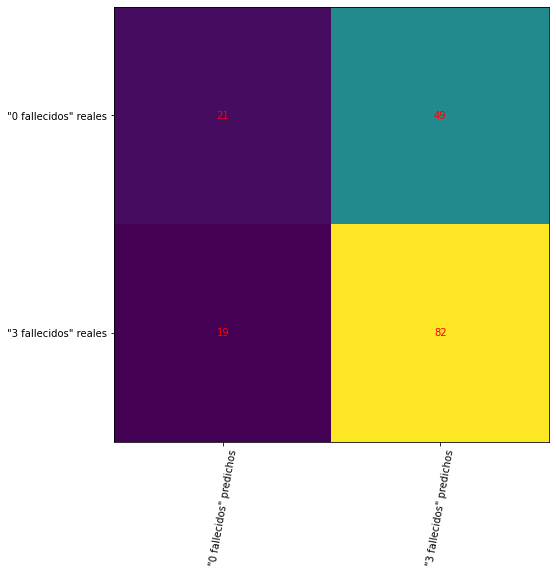

In [943]:
cm = confusion_matrix(Y_test, logReg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('"0 fallecidos" predichos', '"3 fallecidos" predichos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('"0 fallecidos" reales', '"3 fallecidos" reales'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Tal como se comentó con anterioridad, el modelo clasifica de forma más óptima la categoría _Fallecidos = 3_ que su contraparte. Además, ocurrió lo deseado: el número de _verdaderos negativos_ resultó mayor que el de _falsos positivos_, lo cual bajo el contexto de la problemática, es lo deseado.

In [945]:
# Se crea un dataset con las columnas si que poseen los valores nulos que despues seran reemplazados
columnas_cat = ["Comuna"]
df3 = df[["X", "Y", "Comuna", "Interseccion", "Numero"]][df.Fallecidos.isnull()]
df3Dummie = pd.get_dummies(df3, columns = columnas_cat)
df3Dummie

,X,Y,Interseccion,Numero,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
5305,-70.856193,-33.403052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5310,-70.797949,-33.511712,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,-70.785837,-33.561723,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5337,-70.778886,-33.533287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5351,-70.774314,-33.491959,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,-70.650928,-33.444520,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9232,-70.650879,-33.444501,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9233,-70.650836,-33.550417,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9235,-70.650769,-33.449317,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [946]:
# Se predicen los valores mediante la regresion logistica
fallecidos_Pred = logReg.predict(df3Dummie)

Se añexa el resultado al dataset

In [947]:
df3["Fallecidos"] = fallecidos_Pred.astype("float64")
df3.head()

,X,Y,Comuna,Interseccion,Numero,Fallecidos
5305,-70.856193,-33.403052,PUDAHUEL,1,0,3.0
5310,-70.797949,-33.511712,MAIPU,1,0,3.0
5327,-70.785837,-33.561723,MAIPU,1,0,3.0
5337,-70.778886,-33.533287,MAIPU,1,0,3.0
5351,-70.774314,-33.491959,MAIPU,1,0,3.0


Se anexa al dataset concatenado resultante por index

In [948]:
for index, row in df3.iterrows():
    df.loc[index, "Fallecidos"] = row.Fallecidos

In [949]:
# Se revisa que ya no queden valores nulos en esa columna
df.isna().sum()

X                  0
Y                  0
Anio               0
Comuna             0
Calle1             0
Calle2             0
Numero             0
Interseccion       0
Fallecidos         0
Graves          1356
MenosGraves     1447
Leves           1556
dtype: int64

## Clasificador para los que estan en estado grave

In [572]:
# Se observan las comunas que tienen valores nulos en fallecidos
df2 = df[["X", "Y", "Comuna", "Interseccion", "Numero", "Graves"]][df.Graves.isnull()]

# Se crea una lista con las comunas que esten en estos registros
lista_comunas = []
for i, e in enumerate(df2["Comuna"].value_counts().index):
    lista_comunas.append(e)

In [573]:
# Se extraen las columnas que no poseen nulos esos campos y que tengan las comunas que corresponden
df2 = df[["X", "Y", "Comuna", "Interseccion", "Numero", "Graves"]][(df.Comuna.isin(lista_comunas)) & (~df.Graves.isnull())]
df2

,X,Y,Comuna,Interseccion,Graves
0,-70.714761,-33.621957,SAN BERNARDO,0,0.0
1,-70.713433,-33.629206,SAN BERNARDO,0,0.0
2,-70.712113,-33.601339,SAN BERNARDO,1,0.0
3,-70.710571,-33.601829,SAN BERNARDO,1,0.0
4,-70.707259,-33.636547,SANTIAGO,0,1.0
...,...,...,...,...,...
9229,-70.650970,-33.400090,RECOLETA,1,0.0
9231,-70.650889,-33.550401,SAN RAMON,0,1.0
9234,-70.650809,-33.440784,SANTIAGO,1,1.0
9236,-70.650763,-33.431405,RECOLETA,1,1.0


In [574]:
df2["Graves"] = df2["Graves"].astype("int64")

## Aplicación del modelo

In [575]:
df2["Graves"].value_counts()

0    5623
1    2031
2     186
3      29
4       5
5       1
Name: Graves, dtype: int64

La muestra posee varias categorías las cuales no están distribuídas de forma equitativa, por lo que se procede a agrupar un cierto conjunto de valores de estas categorías para el número de personas graves. Las que se agrupan son: _Graves > 0_ bajo la marca de clase _Graves = 3_ (que vendría siendo el valor promedio).<br>
También, se puede apreciar que la mayoría de los registros están bajo la categoría _Graves = 0_, por lo que también se extraera una muestra estratificada por comuna del 25%.<br>
Al igual que para los fallecidos, se plantea el objetivo de tener el mayor número de _verdaderos negativos_ posible respecto a los _falsos positivios_ debido al contexto de la problemática. Es mejor que el modelo prediga que habrá un número de personas en estado grave, para tener los preparativos correspondientes y atender a dichas personas; a que el modelo prediga que no habrá personas graves y por ende estos preparativos no estén siendo que en la realidad si hubo.

In [602]:
# Extraccion de solo aquellos registros que tengan fallecidos
df_estratificado_0 = df2[(df2.Graves == 0)]

In [603]:
# lista de DF por comuna que seran concatenados
frames = []

In [604]:
# funcion para obtener el 10% de las comunas de forma aleatoria y acumularlas en la lista 
def mergeComunas0(lista):
    for e in lista:
        frames.append(df_estratificado_0[df_estratificado_0["Comuna"].str.contains(e)].sample(frac = 0.25, random_state = 1))      

In [605]:
# Llamada a la funcion y concatenacion de DF
mergeComunas0(df_estratificado_0["Comuna"].value_counts().index)
df_estratificado = pd.concat(frames)
df_estratificado

,X,Y,Comuna,Interseccion,Graves
4129,-70.664820,-33.446013,SANTIAGO,0,0
1753,-70.669804,-33.432195,SANTIAGO,0,0
3006,-70.660316,-33.442894,SANTIAGO,1,0
4038,-70.674292,-33.449637,SANTIAGO,1,0
796,-70.661871,-33.436022,SANTIAGO,0,0
...,...,...,...,...,...
8978,-70.727006,-33.486919,CERRILLOS,1,0
8963,-70.729084,-33.502068,CERRILLOS,1,0
5303,-70.870458,-33.282819,LAMPA,0,0
8728,-70.765670,-33.287190,LAMPA,0,0


Concatenación del dataframe que contiene los _Graves = 0_ y _Graves = 1_ con el dataframe de las otras categorías.

In [606]:
df_final = pd.concat([df_estratificado, df2[(df2.Graves != 0)]])
df_final

,X,Y,Comuna,Interseccion,Graves
4129,-70.664820,-33.446013,SANTIAGO,0,0
1753,-70.669804,-33.432195,SANTIAGO,0,0
3006,-70.660316,-33.442894,SANTIAGO,1,0
4038,-70.674292,-33.449637,SANTIAGO,1,0
796,-70.661871,-33.436022,SANTIAGO,0,0
...,...,...,...,...,...
9223,-70.651277,-33.424025,INDEPENDENCIA,0,1
9231,-70.650889,-33.550401,SAN RAMON,0,1
9234,-70.650809,-33.440784,SANTIAGO,1,1
9236,-70.650763,-33.431405,RECOLETA,1,1


In [607]:
df_final["Graves"].value_counts()

1    2031
0    1406
2     186
3      29
4       5
5       1
Name: Graves, dtype: int64

In [608]:
#Funcion para agrupar las categorias de Graves in (2,3,4,5)  en fallecidos = 4
df_final["Graves"] = df_final["Graves"].apply(lambda x: 3 if (x > 0) else x)
df_final["Graves"].value_counts()

3    2252
0    1406
Name: Graves, dtype: int64

In [609]:
# Variables dummies
columnas_cat = ["Comuna"]
df_completo = pd.get_dummies(df_final, columns = columnas_cat)
df_completo

,X,Y,Interseccion,Graves,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
4129,-70.664820,-33.446013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1753,-70.669804,-33.432195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3006,-70.660316,-33.442894,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4038,-70.674292,-33.449637,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
796,-70.661871,-33.436022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,-70.651277,-33.424025,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9231,-70.650889,-33.550401,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9234,-70.650809,-33.440784,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,-70.650763,-33.431405,1,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Aplicación del modelo de regresion logística multinomial

In [610]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df_completo.drop(["Graves"], axis = 1) # variables independientes
Y = df_completo["Graves"]

In [611]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (2926, 40)
Y:  (2926,)
Tamaño de datos de testing: 
X:  (732, 40)
T:  (732,)


In [612]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logReg = logisticRegr.fit(X_train, Y_train)
logReg_pred = logReg.predict(X_test)
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
logReg_f1 = f1_score(Y_test, logReg_pred, average='weighted')
print('Regresion Logistica Multinomial (accuracy): ', (logReg_accuracy*100))
print('Regresion Logistica Multinomial (f1-score): ', (logReg_f1*100))

Regresion Logistica Multinomial (accuracy):  59.83606557377049
Regresion Logistica Multinomial (f1-score):  49.36577935427518


In [613]:
confusion_matrix(Y_test, logReg_pred)

array([[ 15, 265],
       [ 29, 423]], dtype=int64)

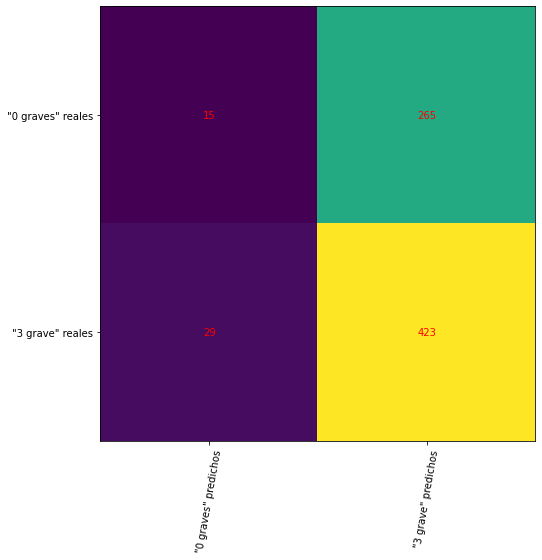

In [614]:
cm = confusion_matrix(Y_test, logReg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('"0 graves" predichos', '"3 grave" predichos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('"0 graves" reales', '"3 grave" reales'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Tal como se puede apreciar, el modelo genera un clasificador muy bueno para el el número de personas en estado grave _Graves = 3_ y particularmente, se logra lo que se deseaba, que diese un mayor número de verdaderos negativos, que respecto a falsos positivos, que serían los 265 casos predichos como _3 personas en estado grave_ (siendo que no fueron realmente así) respecto a los 29 casos predichos como _0 personas en estado grave_ (siendo que fueron totalmente lo opuesto).

In [615]:
# Se crea un dataset con las columnas si que poseen los valores nulos que despues seran reemplazados
columnas_cat = ["Comuna"]
df3 = df[["X", "Y", "Comuna", "Interseccion"]][df.Graves.isnull()]
df3.Comuna.value_counts()
df3Dummie = pd.get_dummies(df3, columns = columnas_cat)
df3Dummie

,X,Y,Interseccion,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,Comuna_HUECHURABA,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
5305,-70.856193,-33.403052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5310,-70.797949,-33.511712,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,-70.785837,-33.561723,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5337,-70.778886,-33.533287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5351,-70.774314,-33.491959,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,-70.650928,-33.444520,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9232,-70.650879,-33.444501,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9233,-70.650836,-33.550417,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9235,-70.650769,-33.449317,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [616]:
# Se predicen los valores mediante la regresion logistica
graves_Pred = logReg.predict(df3Dummie)

In [617]:
df3["Graves"] = graves_Pred.astype("float64")
df3.head()

,X,Y,Comuna,Interseccion,Graves
5305,-70.856193,-33.403052,PUDAHUEL,1,3.0
5310,-70.797949,-33.511712,MAIPU,1,0.0
5327,-70.785837,-33.561723,MAIPU,1,0.0
5337,-70.778886,-33.533287,MAIPU,1,0.0
5351,-70.774314,-33.491959,MAIPU,1,0.0


In [618]:
for index, row in df3.iterrows():
    df.loc[index, "Graves"] = row.Graves

In [619]:
# Se revisa que ya no queden valores nulos en esa columna
df.isna().sum()

X                  0
Y                  0
Anio               0
Comuna             0
Calle1             0
Calle2             0
Numero             0
Interseccion       0
Fallecidos         0
Graves             0
MenosGraves     1447
Leves           1556
dtype: int64

# Clasificador para los que estan en estado menos grave

In [620]:
# Se observan las comunas que tienen valores nulos en fallecidos
df2 = df[["X", "Y", "Comuna", "Interseccion", "MenosGraves"]][df.MenosGraves.isnull()]

# Se crea una lista con las comunas que esten en estos registros
lista_comunas = []
for i, e in enumerate(df2["Comuna"].value_counts().index):
    lista_comunas.append(e)

In [621]:
# Se extraen las columnas que no poseen nulos esos campos y que tengan las comunas que corresponden
df2 = df[["X", "Y", "Comuna", "Interseccion", "MenosGraves"]][(df.Comuna.isin(lista_comunas)) & (~df.Leves.isnull())]
df2

,X,Y,Comuna,Interseccion,MenosGraves
0,-70.714761,-33.621957,SAN BERNARDO,0,0.0
1,-70.713433,-33.629206,SAN BERNARDO,0,0.0
2,-70.712113,-33.601339,SAN BERNARDO,1,0.0
3,-70.710571,-33.601829,SAN BERNARDO,1,0.0
4,-70.707259,-33.636547,SANTIAGO,0,0.0
...,...,...,...,...,...
9228,-70.651021,-33.434221,SANTIAGO,1,0.0
9229,-70.650970,-33.400090,RECOLETA,1,0.0
9231,-70.650889,-33.550401,SAN RAMON,0,0.0
9236,-70.650763,-33.431405,RECOLETA,1,0.0


In [622]:
df2["MenosGraves"] = df2["MenosGraves"].astype("int64")

In [623]:
df2["MenosGraves"].value_counts()

0    6929
1     701
2      43
3       2
Name: MenosGraves, dtype: int64

Se puede apreciar un claro desbalance entre la cantidad de personas en estado grave y las que no lo estuvieron. Para esto, se agrupan las categorías de _MenosGraves > 0_ con la respectiva marca de clase _MenosGraves = 3_. <br>
Posterior a esto, se puede apreciar que la mayoría de los registros están bajo la categoría MenosGraves = 0, por lo que también se extraera una muestra estratificada por comuna del 10% para esta categoría.

In [624]:
# Extraccion de solo aquellos registros que tengan fallecidos
df_estratificado = df2[(df2.MenosGraves == 0)]

In [625]:
# lista de DF por comuna que seran concatenados
frames = []

In [626]:
# Se añade la comuna de "Padre Hurtado" para que al aplicar las variables dummies sobre la "Comuna" calcen la cantidad
# de variables independientes respecto a la dependiente
def mergeComunas(lista):
    for e in lista:
        frames.append(df_estratificado[(df_estratificado["Comuna"] == "PADRE HURTADO") | (df_estratificado["Comuna"].str.contains(e)) ].sample(frac = 0.1, random_state = 1)) 

In [627]:
# Llamada a la funcion y concatenacion de DF
mergeComunas(df_estratificado["Comuna"].value_counts().index)
df_estratificado = pd.concat(frames)
df_estratificado

,X,Y,Comuna,Interseccion,MenosGraves
4294,-70.648617,-33.468612,SANTIAGO,1,0
1613,-70.670426,-33.448590,SANTIAGO,1,0
9091,-70.661475,-33.453375,SANTIAGO,1,0
5646,-70.714283,-33.589404,SANTIAGO,0,0
4173,-70.660501,-33.451932,SANTIAGO,1,0
...,...,...,...,...,...
7925,-70.700078,-33.286137,COLINA,0,0
8984,-70.726358,-33.491615,CERRILLOS,0,0
5598,-70.725922,-33.490126,CERRILLOS,0,0
8857,-70.744998,-33.510215,CERRILLOS,1,0


In [628]:
df_final = pd.concat([df_estratificado, df2[df2.MenosGraves != 0]])
df_final

,X,Y,Comuna,Interseccion,MenosGraves
4294,-70.648617,-33.468612,SANTIAGO,1,0
1613,-70.670426,-33.448590,SANTIAGO,1,0
9091,-70.661475,-33.453375,SANTIAGO,1,0
5646,-70.714283,-33.589404,SANTIAGO,0,0
4173,-70.660501,-33.451932,SANTIAGO,1,0
...,...,...,...,...,...
9103,-70.660459,-33.421348,INDEPENDENCIA,0,1
9169,-70.655442,-33.395328,RECOLETA,0,1
9220,-70.651449,-33.429419,RECOLETA,0,1
9222,-70.651285,-33.455648,SANTIAGO,1,1


In [629]:
df_final["MenosGraves"].value_counts()

0    703
1    701
2     43
3      2
Name: MenosGraves, dtype: int64

In [630]:
#Funcion para agrupar las categorias de MenosGraves in (1,2,3) en MenosGraves = 3
df_final["MenosGraves"] = df_final["MenosGraves"].apply(lambda x: 3 if (x > 0) else x)
df_final["MenosGraves"].value_counts()

3    746
0    703
Name: MenosGraves, dtype: int64

In [631]:
# Variables dummies
columnas_cat = ["Comuna"]
df_completo = pd.get_dummies(df_final, columns = columnas_cat)
df_completo

,X,Y,Interseccion,MenosGraves,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
4294,-70.648617,-33.468612,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1613,-70.670426,-33.448590,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9091,-70.661475,-33.453375,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5646,-70.714283,-33.589404,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4173,-70.660501,-33.451932,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,-70.660459,-33.421348,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9169,-70.655442,-33.395328,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9220,-70.651449,-33.429419,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9222,-70.651285,-33.455648,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Aplicación del modelo de regresión logística

In [632]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df_completo.drop(["MenosGraves"], axis = 1) # variables independientes
Y = df_completo["MenosGraves"]

In [633]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (1159, 40)
Y:  (1159,)
Tamaño de datos de testing: 
X:  (290, 40)
T:  (290,)


In [634]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logReg = logisticRegr.fit(X_train, Y_train)
logReg_pred = logReg.predict(X_test)
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
logReg_f1 = f1_score(Y_test, logReg_pred, average='weighted')
print('Regresion Logistica Multinomial (accuracy): ', (logReg_accuracy*100))
print('Regresion Logistica Multinomial (f1-score): ', (logReg_f1*100))

Regresion Logistica Multinomial (accuracy):  52.41379310344828
Regresion Logistica Multinomial (f1-score):  51.99849529780565


In [635]:
confusion_matrix(Y_test, logReg_pred)

array([[56, 78],
       [60, 96]], dtype=int64)

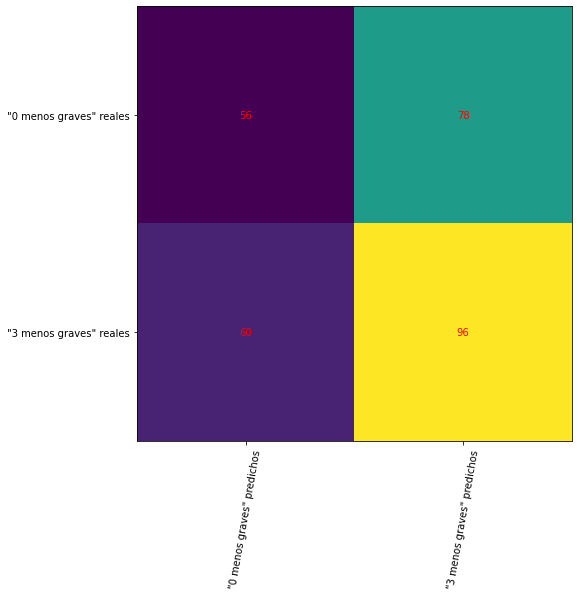

In [636]:
cm = confusion_matrix(Y_test, logReg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('"0 menos graves" predichos', '"3 menos graves" predichos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('"0 menos graves" reales', '"3 menos graves" reales'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

De forma similar a lo anterior, el clasificador opera de buena manera con el caso de _3 personas en estado menos grave_ respecto a las _0 personas en estado menos grave_. Se logra el objetivo de que, la cantidad de verdaderos negativos sea mayor a la cantidad de falsos positivos, lo cual bajo el contexto de la problemática abordada, es lo deseado.

In [637]:
# Se crea un dataset con las columnas si que poseen los valores nulos que despues seran reemplazados
columnas_cat = ["Comuna"]
df3 = df[["X", "Y", "Comuna", "Interseccion"]][df.MenosGraves.isnull()]
df3.Comuna.value_counts()
df3Dummie = pd.get_dummies(df3, columns = columnas_cat)
df3Dummie

,X,Y,Interseccion,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,Comuna_HUECHURABA,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
5305,-70.856193,-33.403052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5310,-70.797949,-33.511712,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,-70.785837,-33.561723,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5337,-70.778886,-33.533287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5351,-70.774314,-33.491959,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,-70.650928,-33.444520,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9232,-70.650879,-33.444501,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9233,-70.650836,-33.550417,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9235,-70.650769,-33.449317,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [638]:
# Se predicen los valores mediante la regresion logistica
menosGraves_Pred = logReg.predict(df3Dummie)

In [639]:
df3["MenosGraves"] = menosGraves_Pred.astype("float64")
df3.head()

,X,Y,Comuna,Interseccion,MenosGraves
5305,-70.856193,-33.403052,PUDAHUEL,1,3.0
5310,-70.797949,-33.511712,MAIPU,1,3.0
5327,-70.785837,-33.561723,MAIPU,1,3.0
5337,-70.778886,-33.533287,MAIPU,1,3.0
5351,-70.774314,-33.491959,MAIPU,1,3.0


In [640]:
for index, row in df3.iterrows():
    df.loc[index, "MenosGraves"] = row.MenosGraves

In [641]:
# Se revisa que ya no queden valores nulos en esa columna
df.isna().sum()

X                  0
Y                  0
Anio               0
Comuna             0
Calle1             0
Calle2             0
Numero             0
Interseccion       0
Fallecidos         0
Graves             0
MenosGraves        0
Leves           1556
dtype: int64

# Clasificador para los que estan en estado leve

In [897]:
df[["X", "Y", "Comuna", "Interseccion", "Numero", "Leves"]][df.Leves.isnull()]

,X,Y,Comuna,Interseccion,Leves


In [891]:
# Se observan las comunas que tienen valores nulos en fallecidos
df2 = df[["X", "Y", "Comuna", "Interseccion", "Numero" , "Leves"]][df.Leves.isnull()]

# Se crea una lista con las comunas que esten en estos registros
lista_comunas = []
for i, e in enumerate(df2["Comuna"].value_counts().index):
    lista_comunas.append(e)

In [893]:
lista_comunas

[]

In [892]:
# Se extraen las columnas que no poseen nulos esos campos y que tengan las comunas que corresponden
df2 = df[["X", "Y", "Comuna", "Interseccion", "Numero", "Leves"]][(df.Comuna.isin(lista_comunas)) & (~df.Leves.isnull())]
df2

,X,Y,Comuna,Interseccion,Numero,Leves


In [865]:
df2["Leves"] = df2["Leves"].astype("int64")

In [866]:
df2["Leves"].value_counts()

1     3906
0     2816
2      745
3      146
4       32
5       16
6        8
7        5
10       1
Name: Leves, dtype: int64

Se puede apreciar con claridad que los datos están distribuidos de forma muy desigual entre las categorías de _1 ó 0 personas en estado leve_ respecto a las demás. Si se aplica un clasificador con la distribución actual de datos es muy probable que el resultado esté desmasiado desbalanceado hácia las categorías con mayor volumen de datos. <br>
Para palear esto último, se agrupan las categorías de _Leves igual a 2, 3, 4, 5, 6, 7 y 10_  en una sóla bajo la marca de clase _Leves = 5_ (promedio entre las categorías), puesto que no tiene sentido tener categorías con menos de 100 registros comparadas a otras que poseen más de 2000. Luego, se extrae una muestra de estandarizada por comunas de un 25% para la cateogría _Leves = 1_ y de un 33% para la categoría _Leves = 0_. La idea de este clasificador, al igual que los anteriores, es que arroje mayor cantidad de verdaderos negativos respecto a falsos positivos debido al contexto del problema.

In [867]:
# Extraccion de solo aquellos registros que tengan fallecidos
df_estratificado_1 = df2[(df2.Leves == 1)]
df_estratificado_0 = df2[(df2.Leves == 0)]

In [868]:
# lista de DF por comuna que seran concatenados
frames = []

In [869]:
# funcion para obtener el 10% de las comunas de forma aleatoria y acumularlas en la lista 
def mergeComunas1(lista):
    for e in lista:
        frames.append(df_estratificado_1[df_estratificado_1["Comuna"].str.contains(e)].sample(frac = 0.25, random_state = 1))
        
def mergeComunas0(lista):
    for e in lista:
        frames.append(df_estratificado_0[df_estratificado_0["Comuna"].str.contains(e)].sample(frac = 0.33, random_state = 1))             

In [870]:
# Llamada a la funcion y concatenacion de DF
mergeComunas1(df_estratificado_1["Comuna"].value_counts().index)
mergeComunas0(df_estratificado_0["Comuna"].value_counts().index)
df_estratificado = pd.concat(frames)
df_estratificado

,X,Y,Comuna,Interseccion,Leves
7170,-70.657502,-33.432091,SANTIAGO,1,1
1060,-70.636420,-33.442615,SANTIAGO,1,1
7430,-70.636884,-33.444555,SANTIAGO,1,1
1628,-70.652066,-33.457342,SANTIAGO,1,1
3055,-70.656615,-33.470054,SANTIAGO,1,1
...,...,...,...,...,...
5624,-70.720032,-33.501152,CERRILLOS,0,0
6845,-70.690921,-33.479671,CERRILLOS,1,0
8714,-70.769098,-33.288710,LAMPA,0,0
8642,-70.874769,-33.280167,LAMPA,1,0


In [871]:
df_final = pd.concat([df_estratificado, df2[(df2.Leves != 0) & (df2.Leves != 1)]])
df_final

,X,Y,Comuna,Interseccion,Leves
7170,-70.657502,-33.432091,SANTIAGO,1,1
1060,-70.636420,-33.442615,SANTIAGO,1,1
7430,-70.636884,-33.444555,SANTIAGO,1,1
1628,-70.652066,-33.457342,SANTIAGO,1,1
3055,-70.656615,-33.470054,SANTIAGO,1,1
...,...,...,...,...,...
9164,-70.655916,-33.433539,SANTIAGO,0,2
9173,-70.655338,-33.403297,RECOLETA,1,2
9192,-70.653522,-33.441045,SANTIAGO,1,2
9217,-70.651595,-33.435050,SANTIAGO,1,3


In [872]:
#Funcion para agrupar las categorias de MenosGraves in (1,2,3) en MenosGraves = 3
df_final["Leves"] = df_final["Leves"].apply(lambda x: 5 if (x in [2, 3, 4, 5, 6, 7, 10]) else x)
df_final["Leves"].value_counts()

1    978
5    953
0    930
Name: Leves, dtype: int64

In [873]:
# Variables dummies
columnas_cat = ["Comuna"]
df_completo = pd.get_dummies(df_final, columns = columnas_cat)
df_completo

,X,Y,Interseccion,Leves,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
7170,-70.657502,-33.432091,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1060,-70.636420,-33.442615,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7430,-70.636884,-33.444555,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1628,-70.652066,-33.457342,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3055,-70.656615,-33.470054,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,-70.655916,-33.433539,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9173,-70.655338,-33.403297,1,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9192,-70.653522,-33.441045,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9217,-70.651595,-33.435050,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Aplicación de modelo de regresión logística

In [874]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df_completo.drop(["Leves"], axis = 1) # variables independientes
Y = df_completo["Leves"]

In [875]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (2288, 40)
Y:  (2288,)
Tamaño de datos de testing: 
X:  (573, 40)
T:  (573,)


In [876]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logReg = logisticRegr.fit(X_train, Y_train)
logReg_pred = logReg.predict(X_test)
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
logReg_f1 = f1_score(Y_test, logReg_pred, average='weighted')
print('Regresion Logistica Multinomial (accuracy): ', (logReg_accuracy*100))
print('Regresion Logistica Multinomial (f1-score): ', (logReg_f1*100))

Regresion Logistica Multinomial (accuracy):  36.99825479930192
Regresion Logistica Multinomial (f1-score):  36.085645282856554


In [877]:
confusion_matrix(Y_test, logReg_pred)

array([[ 64,  46,  78],
       [ 48,  43,  97],
       [ 38,  54, 105]], dtype=int64)

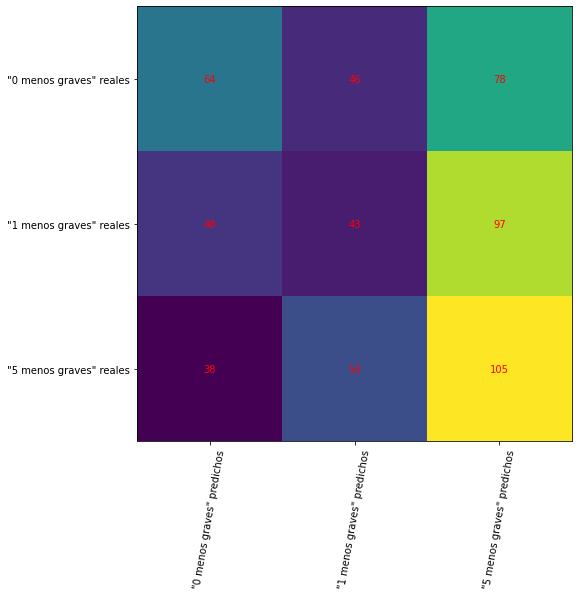

In [878]:
cm = confusion_matrix(Y_test, logReg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"0 menos graves" predichos', '"1 menos graves" predichos', '"5 menos graves" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"0 menos graves" reales', '"1 menos graves" reales', '"5 menos graves" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Se puede apreciar un claro desbalance en el clasificador; pero tienede a clasificar de buena forma la categoría agrupada de _menos graves = 5_. A pesar de tener un bajo porcentaje de acierto, cumple con lo que se desea bajo el contexto de la problemática de accidentes automovilísticos, intentar maximizar la cantidad de _verdaderos negativos_ respecto a los _falsos positivos_, puesto que, nuevamente es mejor predecir que existe un cierto número de personas en estado leve y así tener los preparativos correspondientes para atenderlas en el accidente de tránsito, a que dichos preparativos no estén siendo que fueron requeridos.

In [879]:
# Se crea un dataset con las columnas si que poseen los valores nulos que despues seran reemplazados
columnas_cat = ["Comuna"]
df3 = df[["X", "Y", "Comuna", "Interseccion"]][df.Leves.isnull()]
df3.Comuna.value_counts()
df3Dummie = pd.get_dummies(df3, columns = columnas_cat)
df3Dummie

,X,Y,Interseccion,Comuna_CERRILLOS,Comuna_CERRO NAVIA,Comuna_COLINA,Comuna_CONCHALI,Comuna_EL BOSQUE,Comuna_ESTACION CENTRAL,Comuna_HUECHURABA,...,Comuna_QUINTA NORMAL,Comuna_RECOLETA,Comuna_RENCA,Comuna_SAN BERNARDO,Comuna_SAN JOAQUIN,Comuna_SAN MIGUEL,Comuna_SAN RAMON,Comuna_SANTIAGO,Comuna_VITACURA,Comuna_ÑUÑOA
5305,-70.856193,-33.403052,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5310,-70.797949,-33.511712,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,-70.785837,-33.561723,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5337,-70.778886,-33.533287,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5351,-70.774314,-33.491959,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,-70.650879,-33.444501,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9233,-70.650836,-33.550417,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9234,-70.650809,-33.440784,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9235,-70.650769,-33.449317,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [880]:
# Se predicen los valores mediante la regresion logistica
Leves_Pred = logReg.predict(df3Dummie)

In [882]:
df3["Leves"] = Leves_Pred.astype("float64")
df3.head()

,X,Y,Comuna,Interseccion,Leves
5305,-70.856193,-33.403052,PUDAHUEL,1,1.0
5310,-70.797949,-33.511712,MAIPU,1,5.0
5327,-70.785837,-33.561723,MAIPU,1,5.0
5337,-70.778886,-33.533287,MAIPU,1,5.0
5351,-70.774314,-33.491959,MAIPU,1,5.0


In [884]:
for index, row in df3.iterrows():
    df.loc[index, "Leves"] = row.Leves

In [885]:
# Se revisa que ya no queden valores nulos en esa columna
df.isna().sum()

X               0
Y               0
Anio            0
Comuna          0
Calle1          0
Calle2          0
Numero          0
Interseccion    0
Fallecidos      0
Graves          0
MenosGraves     0
Leves           0
dtype: int64

Se convierten a variables de tipo entera las que estan como tipo real.

In [888]:
df["Fallecidos"] = df["Fallecidos"].astype("int64")
df["Graves"] = df["Graves"].astype("int64")
df["MenosGraves"] = df["MenosGraves"].astype("int64")
df["Leves"] = df["Leves"].astype("int64")
df.dtypes

X               float64
Y               float64
Anio              int64
Comuna           object
Calle1           object
Calle2           object
Numero            int64
Interseccion      int64
Fallecidos        int64
Graves            int64
MenosGraves       int64
Leves             int64
dtype: object